Подключение к Метатрэйдер 5

In [1]:
from datetime import datetime
from MetaTrader5 import *
MT5Initialize()
MT5WaitForTerminal()

print(MT5TerminalInfo())
print(MT5Version())

[2, 'MetaQuotes-Demo', '21592194']
[500, 2228, '18 Nov 2019']


Загрузка ценовых данных

In [2]:
rates = MT5CopyRatesRange("EURUSD", MT5_TIMEFRAME_D1, datetime(1971,1,1), datetime(2019,11,21))

Преобразование данных в пандас датафрейм

In [3]:
import pandas as pd
d = pd.DataFrame(list(rates),
                           columns=['time', 'open', 'high', 'low', 'close', 'tick_volume', 'spread', 'real_volume'])

In [4]:
d

,time,open,high,low,close,tick_volume,spread,real_volume
0,1971-01-04,0.53690,0.53690,0.53690,0.53690,1,50,0
1,1971-01-05,0.53660,0.53660,0.53660,0.53660,1,50,0
2,1971-01-06,0.53650,0.53650,0.53650,0.53650,1,50,0
3,1971-01-07,0.53680,0.53680,0.53680,0.53680,1,50,0
4,1971-01-08,0.53710,0.53710,0.53710,0.53710,1,50,0
...,...,...,...,...,...,...,...,...
12587,2019-11-14,1.10052,1.10273,1.09890,1.10212,32577,1,0
12588,2019-11-15,1.10212,1.10567,1.10145,1.10515,27792,1,0
12589,2019-11-18,1.10510,1.10899,1.10477,1.10718,28482,1,0
12590,2019-11-19,1.10718,1.10838,1.10624,1.10780,26644,1,0


вычисление средней цены бара

In [5]:
d['median']=(d['high']+d['low'])/2

In [6]:
d

,time,open,high,low,close,tick_volume,spread,real_volume,median
0,1971-01-04,0.53690,0.53690,0.53690,0.53690,1,50,0,0.536900
1,1971-01-05,0.53660,0.53660,0.53660,0.53660,1,50,0,0.536600
2,1971-01-06,0.53650,0.53650,0.53650,0.53650,1,50,0,0.536500
3,1971-01-07,0.53680,0.53680,0.53680,0.53680,1,50,0,0.536800
4,1971-01-08,0.53710,0.53710,0.53710,0.53710,1,50,0,0.537100
...,...,...,...,...,...,...,...,...,...
12587,2019-11-14,1.10052,1.10273,1.09890,1.10212,32577,1,0,1.100815
12588,2019-11-15,1.10212,1.10567,1.10145,1.10515,27792,1,0,1.103560
12589,2019-11-18,1.10510,1.10899,1.10477,1.10718,28482,1,0,1.106880
12590,2019-11-19,1.10718,1.10838,1.10624,1.10780,26644,1,0,1.107310


Проверка ряда на стационарность

In [7]:
from incl import *

In [8]:
statc(d['median'].values)

adf:  -2.520483357770675
p-value:  0.11056971212659916
Critical values:  {'1%': -3.43087017142352, '5%': -2.86176989000953, '10%': -2.566892365468227}
есть единичные корни, ряд не стационарен


вычесление показателя Хёрста

In [9]:
dtl=d['median'].values
hurst(dtl)

0.5391513426750832

In [10]:
%matplotlib nbagg
import matplotlib.pyplot as plt

график функции распределения

<IPython.core.display.Javascript object>


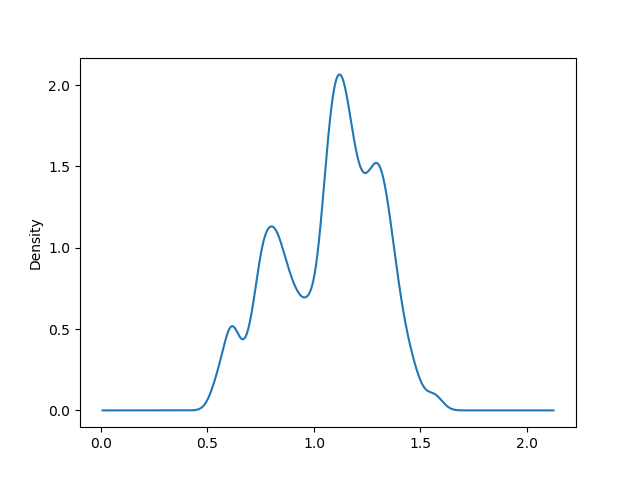

In [11]:
d['median'].plot.kde()

вычисление ряда приращений

In [12]:
d['delta'] = d['median'].diff(1).fillna(0)
d

,time,open,high,low,close,tick_volume,spread,real_volume,median,delta
0,1971-01-04,0.53690,0.53690,0.53690,0.53690,1,50,0,0.536900,0.000000
1,1971-01-05,0.53660,0.53660,0.53660,0.53660,1,50,0,0.536600,-0.000300
2,1971-01-06,0.53650,0.53650,0.53650,0.53650,1,50,0,0.536500,-0.000100
3,1971-01-07,0.53680,0.53680,0.53680,0.53680,1,50,0,0.536800,0.000300
4,1971-01-08,0.53710,0.53710,0.53710,0.53710,1,50,0,0.537100,0.000300
...,...,...,...,...,...,...,...,...,...,...
12587,2019-11-14,1.10052,1.10273,1.09890,1.10212,32577,1,0,1.100815,0.000040
12588,2019-11-15,1.10212,1.10567,1.10145,1.10515,27792,1,0,1.103560,0.002745
12589,2019-11-18,1.10510,1.10899,1.10477,1.10718,28482,1,0,1.106880,0.003320
12590,2019-11-19,1.10718,1.10838,1.10624,1.10780,26644,1,0,1.107310,0.000430


проверка на стационарность ряда приращений

In [13]:
statc(d['delta'].values)

adf:  -25.831260089702525
p-value:  0.0
Critical values:  {'1%': -3.4308701300495503, '5%': -2.8617698717258855, '10%': -2.5668923557359618}
единичных корней нет, ряд стационарен


вычесления показателя Хёрста

In [14]:
dtl=d['delta'].values
hurst(dtl)

0.0016815081616938215

график распределения

<IPython.core.display.Javascript object>


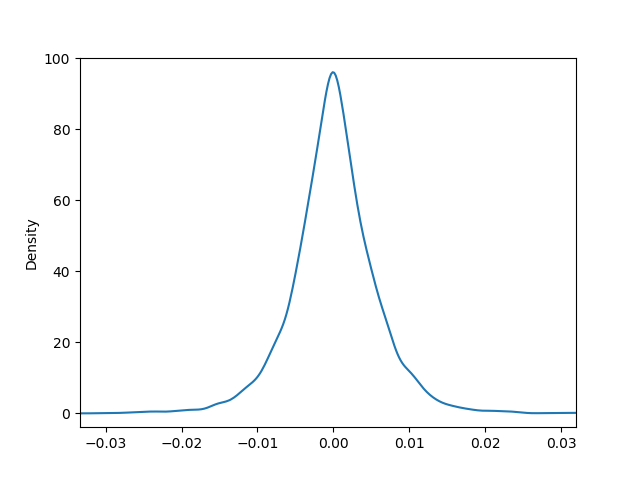

In [15]:
d['delta'].plot.kde()

In [16]:
d['sma']=d.rolling(window=20).mean()['delta'].fillna(0)
d

,time,open,high,low,close,tick_volume,spread,real_volume,median,delta,sma
0,1971-01-04,0.53690,0.53690,0.53690,0.53690,1,50,0,0.536900,0.000000,0.000000
1,1971-01-05,0.53660,0.53660,0.53660,0.53660,1,50,0,0.536600,-0.000300,0.000000
2,1971-01-06,0.53650,0.53650,0.53650,0.53650,1,50,0,0.536500,-0.000100,0.000000
3,1971-01-07,0.53680,0.53680,0.53680,0.53680,1,50,0,0.536800,0.000300,0.000000
4,1971-01-08,0.53710,0.53710,0.53710,0.53710,1,50,0,0.537100,0.000300,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
12587,2019-11-14,1.10052,1.10273,1.09890,1.10212,32577,1,0,1.100815,0.000040,-0.000471
12588,2019-11-15,1.10212,1.10567,1.10145,1.10515,27792,1,0,1.103560,0.002745,-0.000534
12589,2019-11-18,1.10510,1.10899,1.10477,1.10718,28482,1,0,1.106880,0.003320,-0.000451
12590,2019-11-19,1.10718,1.10838,1.10624,1.10780,26644,1,0,1.107310,0.000430,-0.000321


In [17]:
statc(d['sma'].values)

adf:  -12.675070344006933
p-value:  1.2208496957019286e-23
Critical values:  {'1%': -3.4308711663772278, '5%': -2.8617703296912143, '10%': -2.5668925995079444}
единичных корней нет, ряд стационарен


In [18]:
dtl=d['sma'].values
hurst(dtl)

0.2254399989178262

<IPython.core.display.Javascript object>


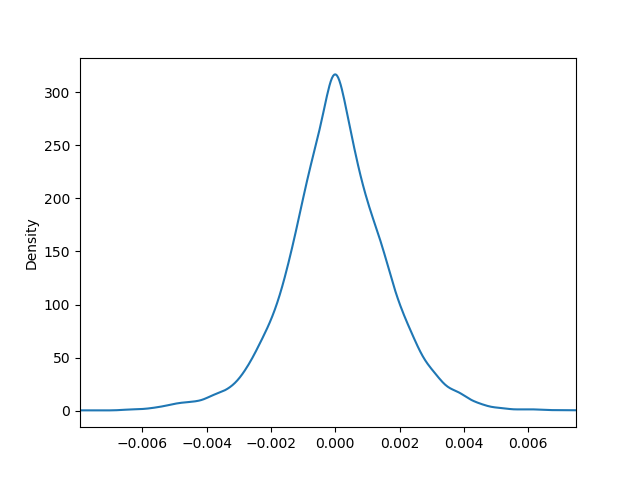

In [19]:
d['sma'].plot.kde()

In [20]:
df=d[8000:]
isnorm(df['delta'].values)

Statistics= 0.9746578335762024
p-value:= 8.119633978689089e-28
Распределение не соответствует нормальному


In [21]:
df

,time,open,high,low,close,tick_volume,spread,real_volume,median,delta,sma
8000,2002-03-22,0.88280,0.88300,0.87490,0.87800,8364,50,0,0.878950,-0.004400,0.000300
8001,2002-03-25,0.87730,0.87850,0.87520,0.87660,8498,50,0,0.876850,-0.002100,0.000227
8002,2002-03-26,0.87680,0.87980,0.87310,0.87660,9340,50,0,0.876450,-0.000400,0.000475
8003,2002-03-27,0.87670,0.87730,0.87190,0.87250,8799,50,0,0.874600,-0.001850,0.000495
8004,2002-03-28,0.87240,0.87460,0.86980,0.87120,8949,50,0,0.872200,-0.002400,0.000305
...,...,...,...,...,...,...,...,...,...,...,...
12587,2019-11-14,1.10052,1.10273,1.09890,1.10212,32577,1,0,1.100815,0.000040,-0.000471
12588,2019-11-15,1.10212,1.10567,1.10145,1.10515,27792,1,0,1.103560,0.002745,-0.000534
12589,2019-11-18,1.10510,1.10899,1.10477,1.10718,28482,1,0,1.106880,0.003320,-0.000451
12590,2019-11-19,1.10718,1.10838,1.10624,1.10780,26644,1,0,1.107310,0.000430,-0.000321


In [22]:
isnorm(df['sma'].values)

Statistics= 0.9784500598907471
p-value:= 7.757880009073024e-26
Распределение не соответствует нормальному


<IPython.core.display.Javascript object>


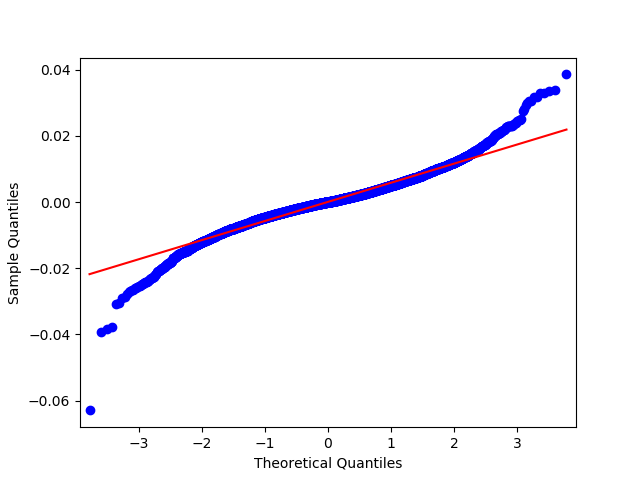

In [23]:
qqgraf(d['delta'])

In [24]:
ln=d['delta'].values
ln

array([ 0.00e+00, -3.00e-04, -1.00e-04, ...,  3.32e-03,  4.30e-04,
       -5.95e-04])

In [25]:
import numpy as np
as_strided = np.lib.stride_tricks.as_strided

In [26]:
win = 5
v = as_strided(ln, (len(d) - (win - 1), win), (ln.strides * 2))
v

array([[ 0.000e+00, -3.000e-04, -1.000e-04,  3.000e-04,  3.000e-04],
       [-3.000e-04, -1.000e-04,  3.000e-04,  3.000e-04,  0.000e+00],
       [-1.000e-04,  3.000e-04,  3.000e-04,  0.000e+00,  0.000e+00],
       ...,
       [-9.200e-04, -1.275e-03,  4.000e-05,  2.745e-03,  3.320e-03],
       [-1.275e-03,  4.000e-05,  2.745e-03,  3.320e-03,  4.300e-04],
       [ 4.000e-05,  2.745e-03,  3.320e-03,  4.300e-04, -5.950e-04]])

In [27]:
wn=pd.DataFrame(v,columns=['d1','d2','d3','d4','d5'])
wn

,d1,d2,d3,d4,d5
0,0.000000,-0.000300,-0.000100,0.000300,0.000300
1,-0.000300,-0.000100,0.000300,0.000300,0.000000
2,-0.000100,0.000300,0.000300,0.000000,0.000000
3,0.000300,0.000300,0.000000,0.000000,0.000200
4,0.000300,0.000000,0.000000,0.000200,-0.000100
...,...,...,...,...,...
12583,-0.002785,-0.000625,-0.000920,-0.001275,0.000040
12584,-0.000625,-0.000920,-0.001275,0.000040,0.002745
12585,-0.000920,-0.001275,0.000040,0.002745,0.003320
12586,-0.001275,0.000040,0.002745,0.003320,0.000430


In [28]:
from scipy.stats import spearmanr

In [29]:
coef, p = spearmanr(wn['d1'], wn['d2'])
print('кореляция ',coef)
print('p-value ',p)

кореляция  0.2065344675393691
p-value  2.488194147171797e-121


In [30]:
coef, p = spearmanr(wn['d1'], wn['d3'])
print('кореляция ',coef)
print('p-value ',p)

кореляция  -0.007188721531950653
p-value  0.41996730509459546


In [31]:
coef, p = spearmanr(wn['d1'], wn['d4'])
print('кореляция ',coef)
print('p-value ',p)

кореляция  0.013553593845421172
p-value  0.12836493743926122


In [32]:
coef, p = spearmanr(wn['d1'], wn['d5'])
print('кореляция ',coef)
print('p-value ',p)

кореляция  0.01385728688794492
p-value  0.1200280286062723


In [33]:
win = 21
v1 = as_strided(ln, (len(d) - (win - 1), win), (ln.strides * 2))
v1

array([[ 0.000e+00, -3.000e-04, -1.000e-04, ...,  1.000e-04,  0.000e+00,
        -1.000e-04],
       [-3.000e-04, -1.000e-04,  3.000e-04, ...,  0.000e+00, -1.000e-04,
         0.000e+00],
       [-1.000e-04,  3.000e-04,  3.000e-04, ..., -1.000e-04,  0.000e+00,
         0.000e+00],
       ...,
       [ 1.660e-03, -2.180e-03, -1.405e-03, ...,  4.000e-05,  2.745e-03,
         3.320e-03],
       [-2.180e-03, -1.405e-03,  4.650e-04, ...,  2.745e-03,  3.320e-03,
         4.300e-04],
       [-1.405e-03,  4.650e-04, -2.995e-03, ...,  3.320e-03,  4.300e-04,
        -5.950e-04]])

In [34]:
wn1=pd.DataFrame(v1,columns=['d1','d2','d3','d4','d5','d6','d7','d8','d9','d10','d11','d12','d13','d14','d15','d16','d17','d18','d19','d20','d21'])
wn1

,d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,...,d12,d13,d14,d15,d16,d17,d18,d19,d20,d21
0,0.000000,-0.000300,-0.000100,0.000300,0.000300,0.000000,0.000000,0.000200,-0.000100,0.000400,...,-0.000200,0.000400,0.000200,0.000300,-0.000100,0.000300,-0.000200,0.000100,0.000000,-0.000100
1,-0.000300,-0.000100,0.000300,0.000300,0.000000,0.000000,0.000200,-0.000100,0.000400,0.000300,...,0.000400,0.000200,0.000300,-0.000100,0.000300,-0.000200,0.000100,0.000000,-0.000100,0.000000
2,-0.000100,0.000300,0.000300,0.000000,0.000000,0.000200,-0.000100,0.000400,0.000300,-0.000200,...,0.000200,0.000300,-0.000100,0.000300,-0.000200,0.000100,0.000000,-0.000100,0.000000,0.000000
3,0.000300,0.000300,0.000000,0.000000,0.000200,-0.000100,0.000400,0.000300,-0.000200,0.000400,...,0.000300,-0.000100,0.000300,-0.000200,0.000100,0.000000,-0.000100,0.000000,0.000000,0.000300
4,0.000300,0.000000,0.000000,0.000200,-0.000100,0.000400,0.000300,-0.000200,0.000400,0.000200,...,-0.000100,0.000300,-0.000200,0.000100,0.000000,-0.000100,0.000000,0.000000,0.000300,-0.000500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12567,0.004845,0.004000,0.001660,-0.002180,-0.001405,0.000465,-0.002995,-0.000660,0.000470,0.002070,...,-0.000355,0.000005,-0.004825,-0.002295,-0.001500,-0.002785,-0.000625,-0.000920,-0.001275,0.000040
12568,0.004000,0.001660,-0.002180,-0.001405,0.000465,-0.002995,-0.000660,0.000470,0.002070,0.003685,...,0.000005,-0.004825,-0.002295,-0.001500,-0.002785,-0.000625,-0.000920,-0.001275,0.000040,0.002745
12569,0.001660,-0.002180,-0.001405,0.000465,-0.002995,-0.000660,0.000470,0.002070,0.003685,-0.000355,...,-0.004825,-0.002295,-0.001500,-0.002785,-0.000625,-0.000920,-0.001275,0.000040,0.002745,0.003320
12570,-0.002180,-0.001405,0.000465,-0.002995,-0.000660,0.000470,0.002070,0.003685,-0.000355,0.000005,...,-0.002295,-0.001500,-0.002785,-0.000625,-0.000920,-0.001275,0.000040,0.002745,0.003320,0.000430


In [35]:
from Regresion import *

Using TensorFlow backend.


In [36]:
regresion(wn1)

Training -----------
train cost:  0.004766479
train cost:  0.0153606385
train cost:  0.013545227
train cost:  0.01237583
train cost:  0.011358503
train cost:  0.010597353
train cost:  0.009934314
train cost:  0.009440784
train cost:  0.009109929
train cost:  0.008795731
train cost:  0.008578902
train cost:  0.008318294
train cost:  0.008073775
train cost:  0.007837116
train cost:  0.0076331324
train cost:  0.007451373
train cost:  0.0072720908
train cost:  0.0071394164
train cost:  0.0069773756
train cost:  0.006884882
train cost:  0.0067732325
train cost:  0.0066848085
train cost:  0.006608528
train cost:  0.006535527
train cost:  0.006457674
train cost:  0.006384644
train cost:  0.0062975674
train cost:  0.0062413793
train cost:  0.006165739
train cost:  0.0060932385
train cost:  0.0060366075
train cost:  0.005986202
train cost:  0.0059392196
train cost:  0.005899513
train cost:  0.0058645704
train cost:  0.005824515
train cost:  0.0057837255
train cost:  0.0057408065
train cost:  0.